<a href="https://colab.research.google.com/github/Saxenaharsh12/PII_Detection_Correction_System-/blob/main/anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import necessary packages

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

df


In [36]:
## open image and display
original = Image.open(requests.get('https://pbs.twimg.com/media/EAI2pKSU8AATenw?format=jpg&name=900x900.png', stream = True).raw)
tampered = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x788f7ccae070>

In [37]:
# File Format of source file
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image Size,in pixels. Size is givenas 2-Tuple (width,height).
print("Original image size : ",original.size)
print("Tampered image  size :",tampered.size)

AttributeError: 'numpy.ndarray' object has no attribute 'format'

In [38]:
# Resizing Images
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') # Saved as PNG
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #Save image

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [39]:
## Change imafe typpe if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png') # can do png to jpg

array([[[254, 255, 253],
        [254, 255, 253],
        [253, 254, 252],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[254, 255, 253],
        [251, 252, 250],
        [249, 250, 248],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[253, 253, 252],
        [249, 250, 248],
        [252, 253, 251],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[246, 250, 248],
        [225, 228, 233],
        [211, 213, 227],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [244, 240, 232]],

       [[250, 252, 249],
        [246, 248, 249],
        [242, 244, 251],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [249, 249, 243]],

       [[253, 254, 250],
        [253, 255, 253],
        [250, 253, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [251, 254, 252]]], dtype=uint8)
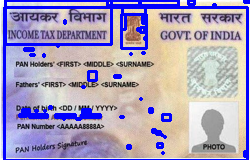

In [40]:
# Display original image
original

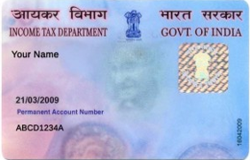

In [41]:
# Display uer given tampered image
tampered

In [42]:
## load 2 input images into OpenCV
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')


In [43]:
## convert the images to grayscale(1 channel)
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [44]:
# Computing structural similarity Index (SSIM) between the Original and Tampered images,ensuring that difference is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


In [45]:
## Calculate threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [46]:
# Loop over  contours (creating bounding rectangle)
for c in cnts:
  # applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w, y+h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x,y), (x+w, y+h), (0, 0, 255), 2)

Original Image


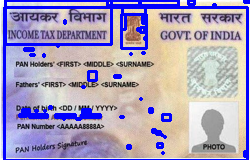

In [47]:
# Display the images with contour
print("Original Image")
Image.fromarray(original)

Tampered Image


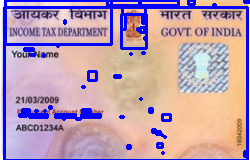

In [48]:
# display tampered image with contours
print("Tampered Image")
Image.fromarray(tampered)


Difference bw the 2 Images


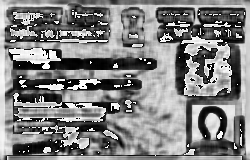

In [49]:
# display difference image with black
print("Difference bw the 2 Images")
Image.fromarray(diff)

Threshold Image


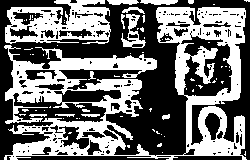

In [50]:
# Displaying Threshold Image with white portion
print("Threshold Image")
Image.fromarray(thresh)